In [54]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    random_state=42,
    shuffle=False)

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f'feature {i}' for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=42)

forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [57]:
import pandas as pd 
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,-0.060101,0.802905,-0.221042,0.069370,0.192597,2.392110,-2.099356,0.683223,-0.114802,0.566772
1,0.173092,-0.900922,-1.579436,-0.817892,0.391209,0.581782,-0.016223,1.156834,0.397397,-0.747456
2,0.152907,0.351335,1.203578,-1.489284,-0.245995,0.446704,0.587058,0.006549,0.542424,-0.808964
3,-1.221291,-1.613671,-0.089234,-0.037571,-1.731201,1.494938,0.041326,0.443002,0.951550,-1.021162
4,0.036849,-1.264263,0.891344,-0.204356,-0.290441,0.444145,0.815754,0.602473,1.040058,-1.018870
...,...,...,...,...,...,...,...,...,...,...
745,-0.004873,-0.161470,0.891304,0.004230,0.618886,1.638360,0.381310,0.311653,-1.518911,-2.630730
746,-1.308476,-1.278945,-0.815376,-1.066235,2.124771,1.331339,1.920368,-1.222895,0.071254,-1.293508
747,-0.259321,0.287089,-1.615887,0.299648,0.932435,-0.415100,0.700701,2.814654,-0.104343,0.393307
748,-1.201226,-1.742594,-1.499016,-0.091845,-0.087435,0.548320,0.949595,-0.059415,1.855503,0.224235


In [58]:
# feature importance 
# feature importance is a measure of how much a feature contributes to the model's prediction
# impurity-based feature importance - se ci sono tanti valori unici, il valore di impurity-based feature importance è più alto, ma potrebbe essere sbagliato or fuorviante

importances = forest.feature_importances_
importances

array([0.12611784, 0.5711449 , 0.04440927, 0.03311521, 0.04251175,
       0.03476126, 0.03691758, 0.03225842, 0.04143411, 0.03732966])

In [59]:
import numpy as np
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.05010482, 0.08746544, 0.02141593, 0.01948477, 0.02346818,
       0.01922708, 0.02052287, 0.01905545, 0.02055053, 0.01857668])

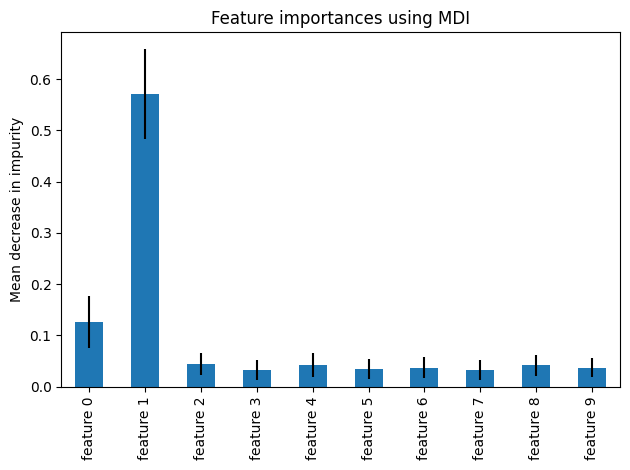

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI") #MDI: Mean Decrease in Impurity
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [61]:
#Feature importance con feature permutation
# feature permutation importance - si calcola la differenza tra l'accuratezza del modello con tutti i dati e l'accuratezza del modello con i dati di una feature permutati
# feature permutation importance è più affidabile rispetto a impurity-based feature importance quando abbiamo tanti valori univoci

from sklearn.inspection import permutation_importance

res = permutation_importance(forest, X_test, y_test, n_repeats=30, random_state=42)

importances = pd.Series(res.importances_mean, index=feature_names)
importances

feature 0    0.066667
feature 1    0.362400
feature 2   -0.000800
feature 3   -0.002400
feature 4   -0.009333
feature 5   -0.003200
feature 6   -0.004933
feature 7   -0.000400
feature 8   -0.006400
feature 9   -0.002933
dtype: float64

In [62]:
res.importances_std

array([0.01327989, 0.02768586, 0.00454899, 0.00366606, 0.00477028,
       0.00348712, 0.00321386, 0.00215407, 0.00244404, 0.00176887])

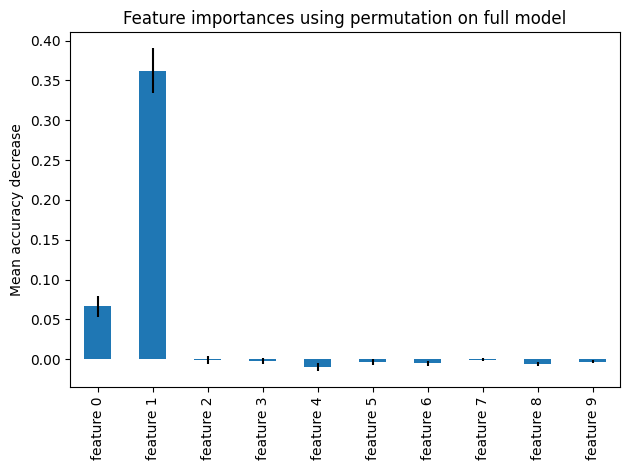

In [63]:
fig, ax = plt.subplots()
importances.plot.bar(yerr=res.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()

# Titanic Disaster: Survivability

Studiare i parametri che aiutano a comprendere cosa contribuisce alla sopravvivenza in un caso come quello del Titanic.


## Problema

Usare tecniche di analisi dei dati, grafici, ML, etc. per predire quali metriche contribuiscono alla sopravvivenza dei passeggeri.

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df_titanic_train = pd.read_csv('data/titanic/train.csv')
df_titanic_test = pd.read_csv('data/titanic/test.csv')

In [65]:
df_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
df_titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Dictionary

|Variable|Definition|Key|
|---|---|---|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Notes
pclass: A proxy for socio-economic status (SES)
- 1st = Upper
- 2nd = Middle
- 3rd = Lower
age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)
parch: The dataset defines family relations in this way...
- Parent = mother, father
- Child = daughter, son, stepdaughter, stepson
- Some children travelled only with a nanny, therefore parch=0 for them.